#Importing the library

In [1]:
#Lets import the needed library
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from collections import defaultdict
from collections import Counter
import seaborn as sns
import networkx as nx
from nltk.cluster.util import cosine_distance
from wordcloud import WordCloud
from textblob import TextBlob

# Reading the post and tweets scraped

In [2]:
# Reading the dataset of the tweets 
df=pd.read_csv("/content/scrapped_data2.csv")

# Analysing the dataframe

## Shape of the dataset

In [3]:
# Seeing the shape of the dataset
df.shape

(171842, 10)

## Info on the dataset

In [4]:
#Lets get info on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171842 entries, 0 to 171841
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Post ID                171842 non-null  object
 1   Title                  171842 non-null  object
 2   Url                    171827 non-null  object
 3   Author                 171842 non-null  object
 4   Score                  171842 non-null  int64 
 5   Publish Date           171842 non-null  object
 6   Total No. of Comments  171842 non-null  int64 
 7   Permalink              171842 non-null  object
 8   Flair                  139952 non-null  object
 9   Text                   104903 non-null  object
dtypes: int64(2), object(8)
memory usage: 13.1+ MB


## Seeing first few rows of the dataset

In [5]:
#Seeing the dataset 
df.head()

,Post ID,Title,Url,Author,Score,Publish Date,Total No. of Comments,Permalink,Flair,Text
0,dlk314,Crypto Retail Adoption Improving - Crypto News,https://bitboycrypto.com/crypto-retail-adoptio...,_solowhizkid_,1,2019-10-23 00:09:06,1,/r/CryptoCurrency/comments/dlk314/crypto_retai...,GENERAL-NEWS,NaN
1,dlk8tj,Pi Crypto Beta Invite,https://www.reddit.com/r/CryptoCurrency/commen...,BrianCog,1,2019-10-23 00:20:24,0,/r/CryptoCurrency/comments/dlk8tj/pi_crypto_be...,NaN,[removed]
2,dlkn0n,Crypto TA Morning Update 10/22,https://www.youtube.com/watch?v=VJky7ErIy0g,TCr0wn,0,2019-10-23 00:48:57,2,/r/CryptoCurrency/comments/dlkn0n/crypto_ta_mo...,TRADING,[deleted]
3,dllneq,#BTC It’s been months since the crypto winter ...,https://www.reddit.com/r/CryptoCurrency/commen...,webnowcompany,1,2019-10-23 01:57:40,1,/r/CryptoCurrency/comments/dllneq/btc_its_been...,NaN,[removed]
4,dlmrd5,Crypto Trading in South Korea Is Dying; Steep ...,https://bitcoinexchangeguide.com/crypto-tradin...,LivingPublic,1,2019-10-23 03:12:27,1,/r/CryptoCurrency/comments/dlmrd5/crypto_tradi...,NaN,NaN


## Datatypes of the columns of the dataframe

In [6]:
#Checking the datatypes of the columns in the dataframe
df.dtypes

Post ID                  object
Title                    object
Url                      object
Author                   object
Score                     int64
Publish Date             object
Total No. of Comments     int64
Permalink                object
Flair                    object
Text                     object
dtype: object

##Counting the NA values on the Text and Title Columns

In [7]:
#Lets count the number of na in the text column
df['Text'].isna().sum()

66939

In [8]:
#Checking the number of na columns in the title column
df.Title.isna().sum()

0

In [9]:
# Since the text column is the most important column inthe dataframe checking unneccesary columns in the dataframe
df['Text'].value_counts()

[removed]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

## Dropping the NA , Removed and Deleted values in the Text Column

In [10]:
# Dropping the columns having na values
df.Text.dropna()

1                                                 [removed]
2                                                 [deleted]
3                                                 [removed]
6         Does anyone have the a copy of the text of the...
8                                                 [removed]
                                ...                        
171828    Crypto is full of scammers, rug pulls, hacks o...
171830                                            [removed]
171831                                            [removed]
171832                                            [removed]
171833    Price go up, then price go down. It’s almost a...
Name: Text, Length: 104903, dtype: object

In [11]:
# Dropping the rows having removed as the text value
df_new=df[df['Text']!='[removed]']

In [12]:
# Dropping the rows having deleted as the text value
df_new=df_new[df_new['Text']!='[deleted]']

In [13]:
df_new.columns

Index(['Post ID', 'Title', 'Url', 'Author', 'Score', 'Publish Date',
       'Total No. of Comments', 'Permalink', 'Flair', 'Text'],
      dtype='object')

In [14]:
df['Text'].isnull().sum()

66939

## Checking the shape of the updated dataframe

In [15]:
# Checking the shape of the updated new dataframe
df_new.shape

(93351, 10)

In [16]:
df_new.Title.value_counts()

Crypto                                                                                                                                                                                                                                64
Get $25 to invest in crypto when you join the waitlist for Stacked Managed Portfolios                                                                                                                                                 60
Crypto Quantum Leap                                                                                                                                                                                                                   31
crypto                                                                                                                                                                                                                                31
💸 Earn free BTC and multiply your crypto with BetFury BOXes 📦 Enjoy 

## Creating a new dataframe

In [17]:
columns=['Title','Text','Publish Date']
df_text=df_new[columns]


In [18]:
df_text= df_text.dropna()

In [19]:
df_text.shape

(26412, 3)

In [20]:
df_text.head(3)

,Title,Text,Publish Date
6,Can you buy crypto with the MCO visa card?,Does anyone have the a copy of the text of the...,2019-10-23 05:18:38
54,Online wallet / service that tracks multiple c...,Wallet is probably wrong word - looking for an...,2019-10-25 05:37:15
71,"Now, the questions is, does crypto beat 5% ann...",I generally disregard the very fluffy content ...,2019-10-25 21:46:01


## Creating three new columns 

In [21]:
#create new column for the character length of each title dataframe
df_text['char_len_of_title'] = df_text.Title.str.len()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
#create new column for the character length of each text dataframe
df_text['char_len_of_text'] = df_text.Text.str.len()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:

def word_count(text):
  ls=list()
  ls=text.split()
  return len(ls)
df_text["WordLength"]  = df_text["Text"].apply(word_count)

In [24]:
# Observing the new features which has been created
df_text.head()

,Title,Text,Publish Date,char_len_of_title,char_len_of_text,WordLength
6,Can you buy crypto with the MCO visa card?,Does anyone have the a copy of the text of the...,2019-10-23 05:18:38,42,228,37
54,Online wallet / service that tracks multiple c...,Wallet is probably wrong word - looking for an...,2019-10-25 05:37:15,68,699,133
71,"Now, the questions is, does crypto beat 5% ann...",I generally disregard the very fluffy content ...,2019-10-25 21:46:01,76,1089,155
72,My journey in crypto since 2017,Hi guys! I've been in crypto since August 2017...,2019-10-25 23:09:53,31,1426,259
96,Is LH-Crypto dead? Was it a scam?,Have you guys heard of [Lh-crypto.io](https://...,2019-10-27 02:34:22,33,368,46


## Summary Statistics on the new columns

In [25]:
#Lets see the  summary statistics of the char_len_of_title
df_text['char_len_of_title'].describe()

count    26412.00000
mean        72.69794
std         45.50538
min          6.00000
25%         42.00000
50%         62.00000
75%         90.00000
max        307.00000
Name: char_len_of_title, dtype: float64

In [26]:
#Lets see the  summary statistics of the char_len_of_text
df_text['char_len_of_text'].describe()

count    26412.000000
mean      1230.415758
std       1591.590745
min          1.000000
25%        539.000000
50%        800.000000
75%       1332.000000
max      39723.000000
Name: char_len_of_text, dtype: float64

In [27]:
#Lets see the  summary statistics of the WordLength
df_text['WordLength'].describe()

count    26412.000000
mean       208.476980
std        251.482299
min          1.000000
25%         96.000000
50%        141.000000
75%        230.000000
max       6807.000000
Name: WordLength, dtype: float64

# Visulization on the columns 

## Plotting histogram for the character legth of content

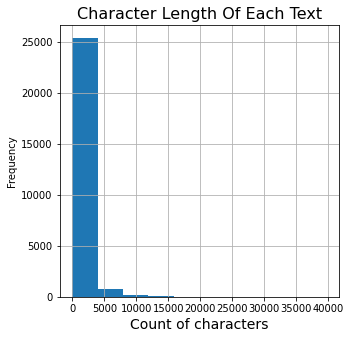

In [28]:
# Creating  visulization on the dataframe df_text  attributes
# Lets plot the histogram for character length  of  content
plt.rcParams['figure.figsize']=(5,5)
df_text['char_len_of_text'].plot(kind='hist',bins=10)
plt.grid()
plt.title("Character Length Of Each Text",fontsize=16)
plt.xlabel("Count of characters",fontsize=14)
plt.show()

## Plotting histogram for the character legth of title

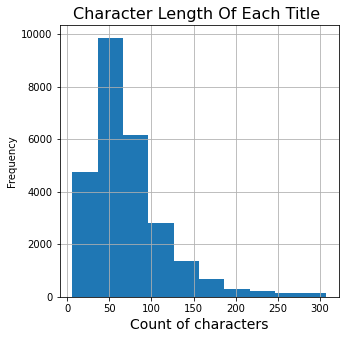

In [29]:
# Creating  visulization on the dataframe df_text  attributes
# Lets plot the histogram for character length  of  title
plt.rcParams['figure.figsize']=(5,5)
df_text['char_len_of_title'].plot(kind='hist',bins=10)
plt.grid()
plt.title("Character Length Of Each Title ",fontsize=16)
plt.xlabel("Count of characters",fontsize=14)
plt.show()

In [30]:
# Defining a method to plot Average word length of each sentence
def plot_average_word_length_of_each_sentence(column,title,xlabel):
# Splitting and storing each word in a list and then Calculating the char length of each word in a sentence then averaging the char length across each sentence
  plt.rcParams['figure.figsize']=(4,4)
  df_text[column].str.split().\
     apply(lambda x : [len(i) for i in x]). \
    map(lambda x: np.mean(x)).hist()
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel("Frequency")
  plt.show()

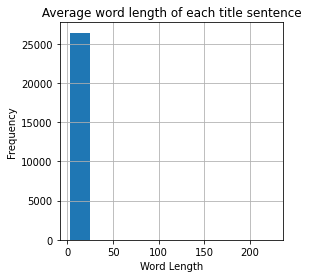

In [31]:
# Plotting for both the title and the content
#plt.subplot(221)
column_t='Title'
title_t =" Average word length of each title sentence "
xlabel_t = "Word Length"
plot_average_word_length_of_each_sentence(column_t,title_t,xlabel_t)


## Calculating top stopwords

In [32]:
# Lets download the stopwords and create a set of those english stop words
nltk.download('stopwords')
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [33]:
#Lets create a corpus and count the occurance of each stop words in the content and see the top 10 stop words
corpus=[]
# Splitting the  sentences into words
news_word= df_text['Text'].str.split() 
news_word_to_list=news_word.values.tolist()
counter_stopwords=0
# Creating a corpus and to dict if its a stopword and also count the number of stop words
corpus=[word for i in news_word_to_list for word in i] 
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        counter_stopwords = counter_stopwords + 1
        dic[word]+=1
# Calculating the top 10 stop words
top_10=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
print(f" The top 10 stop words in the content are : {top_10}")
corpuswords=[word  for word in corpus  if word.isalnum()]
d={'Stopwords':counter_stopwords,'NonStopwords':(len(corpus)-counter_stopwords)}


 The top 10 stop words in the content are : [('the', 191466), ('to', 163399), ('and', 133949), ('a', 121610), ('of', 107295), ('in', 77771), ('is', 75447), ('that', 61003), ('you', 56588), ('for', 53049)]


## Creating a word cloud on top stopwords

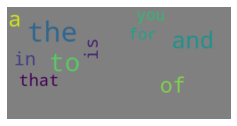

In [34]:
lis=[top_10[i][0] for i in range(10)]
words=str()
d1 = {}
for a, x in top_10:
    d1[a] = x

import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="gray")
wordcloud.generate_from_frequencies(frequencies=d1)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Plotting a pie chart  distribution of stop words vs non stop words

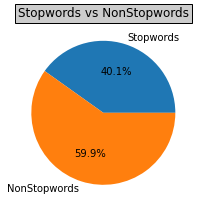

In [35]:
# Lets visualize the number of stop words and non stop words through pie chart
fig = plt.figure(figsize=(5,3))
ax = fig.add_axes((0,0,.5,1))
# Adding title
ax.set_title('Stopwords vs NonStopwords', 
bbox={'facecolor':'0.8', 'pad':3})
# Plotting the pie Chart
plt.rcParams['figure.figsize']=(10,10)
plt.pie(d.values(), labels=d.keys(),autopct='%1.1f%%')
plt.show()


## Barplot of top 10 stopwords

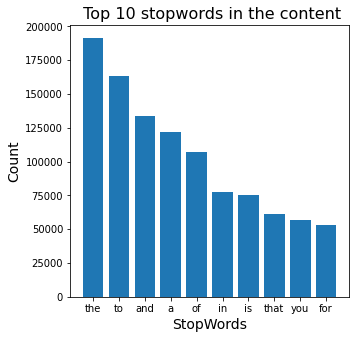

In [36]:
#Lets visualize top 10 occuring stop words in the content
plt.rcParams['figure.figsize']=(5,5)
x,y=zip(*top_10)
plt.title(" Top 10 stopwords in the content",fontsize= 16)
plt.xlabel("StopWords",fontsize = 14)
plt.ylabel("Count",fontsize=14)
plt.bar(x,y)
plt.show()

## Barplot of top non stopwords

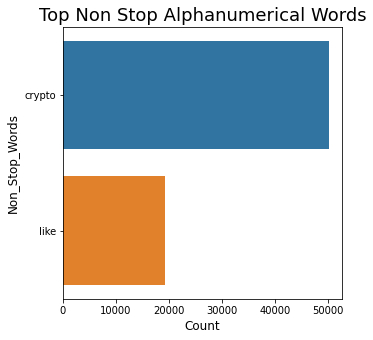

In [37]:
# Lets plot the barplot of the alphanumerical non stop words 
corpus = [token.lower() for token in corpus]
counter=Counter(corpus)
most=counter.most_common()
plt.rcParams['figure.figsize']=(5,5)
x, y= [], []
# Counting the alphanumerical non stop words 
for word,count in most[:40]:
    if (word not in stop and word.isalnum()):
        x.append(word)
        y.append(count)
 # Creating the barplot
b=sns.barplot(x=y,y=x)
b.axes.set_title('Top Non Stop Alphanumerical Words',fontsize=18)
plt.xlabel('Count',fontsize=12) 
plt.ylabel('Non_Stop_Words',fontsize=12)

plt.show()

#Creating a summary method

## Cleaning the text

In [38]:
# Creating a text_clean method to clean the text
def text_clean(text):
    paragraph= text.split(". ")
    sentences = []
  
    for sentence in paragraph:
        sentences.append(sentence.replace("[^a-zA-Z]", " ").split(" "))
    sentences.pop() 
    #print(sentences)
    return sentences

## Cosine Similarity

In [39]:
# Constructing the method to calculate cosine similarity between the two sentences
def sentence_similarity_cosine(sentence1, sentence2, stopwords=None):
    if stopwords is None:
        stopwords = []
 
    sentence1 = [word.lower() for word in sentence1]
    sentence2 = [word.lower() for word in sentence2]
 
    all_words_list = list(set(sentence1 + sentence2))
 
    vector1 = [0] * len(all_words_list)
    vector2 = [0] * len(all_words_list)
 
    # build the vector for the first sentence
    for word in sentence1:
        if word in stopwords:
            continue
        vector1[all_words_list.index(word)] += 1
 
    # build the vector for the second sentence
    for word in sentence2:
        if word in stopwords:
            continue
        vector2[all_words_list.index(word)] += 1
 
    return 1 - cosine_distance(vector1, vector2)
 

## Similarity Matrix

In [40]:
# Constructing similarity matrix using the sentence_similarity_cosine() function defined earlier
def similarity_matrix_construction(sentences, stop_words):
    # Create an empty similarity matrix
    similarity_matrix = np.zeros((len(sentences), len(sentences)))
 
    for index1 in range(len(sentences)):
        for index2 in range(len(sentences)):
            if index1 == index2: #ignore if both are same sentences
                continue 
            similarity_matrix[index1][index2] = sentence_similarity_cosine(sentences[index1], sentences[index2], stop_words)

    return similarity_matrix

## Summary method

In [41]:
# Calls the required functions and creates the summary
def generate_summary(dataset, top_n=3):
    stop_words = stopwords.words('english')
    summarize_text = []

    # Step 1 - Read text anc split it
    sentences =  text_clean(dataset)

    # Step 2 - Generate Similary Martix across sentences
    sentence_similarity_martix = similarity_matrix_construction(sentences, stop_words)

    # Step 3 - Rank sentences in similarity martix
    sentence_similarity_graph = nx.from_numpy_array(sentence_similarity_martix)
    scores = nx.pagerank(sentence_similarity_graph , max_iter = 60000)

    # Step 4 - Sort the rank and pick top sentences
    ranked_sentence = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)    
   # print("Indexes of top ranked_sentence order are ", ranked_sentence)    
    if len(ranked_sentence) >= 1:
      for i in range(1):
        summarize_text.append(" ".join(ranked_sentence[i][1]))
    else:
      summarize_text.append("Nothing to summeraize")
   
    return summarize_text

## Creating summary method for every row of the content column

In [42]:
# Lets create a summary for every row and content column
def summary_content(dataset):
  ls=list()
#  Iterate over the dataset and call the summary method and add the data obtained to a list 
  for i in range(len(dataset)):  
    text=generate_summary(dataset.Text.iloc[i])
    ls.append(text)
  df_summary=pd.DataFrame(ls)
  df_summary['Summary'] = df_summary[df_summary.columns[0:]].apply(   
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1)
  df_summary=df_summary['Summary']
  return df_summary

In [43]:
# Calling the summary_content method 
df_summary=summary_content(df_text[0:10])


## Randomly selecting the row and creating summarization

In [44]:
# Randomly generate the row and send it to the generate_summary method
ind = np.random.randint(0,len(df_text),size=1)
i=int(ind)
text=df_text.Text.iloc[4]
print(text)
result=generate_summary(text)

Have you guys heard of [Lh-crypto.io](https://Lh-crypto.io) ?

Edit: The domain is still up!  I just couldn't reach it over wifi for some reason.  The ICO is supposed to have been over though,

Does anybody have any info?  Here's an outdated "review" from a while ago:

[https://www.forexnewsnow.com/reviews/lh-crypto/](https://www.forexnewsnow.com/reviews/lh-crypto/)


In [45]:
print(result)

["Have you guys heard of [Lh-crypto.io](https://Lh-crypto.io) ?\n\nEdit: The domain is still up!  I just couldn't reach it over wifi for some reason"]


In [46]:
print(text)

Have you guys heard of [Lh-crypto.io](https://Lh-crypto.io) ?

Edit: The domain is still up!  I just couldn't reach it over wifi for some reason.  The ICO is supposed to have been over though,

Does anybody have any info?  Here's an outdated "review" from a while ago:

[https://www.forexnewsnow.com/reviews/lh-crypto/](https://www.forexnewsnow.com/reviews/lh-crypto/)


In [47]:
df_summary

0                                Nothing to summeraize
1    Wallet is probably wrong word - looking for an...
2    This research (linked in the article) from var...
3    Trading only a small portion of my whole portf...
4    Have you guys heard of [Lh-crypto.io](https://...
5    Let's suppose there's another monster rally an...
6    However I was looking into branching out into ...
7    However I was looking into branching out into ...
8    Soon after I started, I realized it sucked and...
9    Topics range from interviews with leading prof...
Name: Summary, dtype: object

## Checking the difference between the summarized and the original text

In [48]:
# Lets take an example and see the difference of length
print(f"The original length of content :{len(df_text.Text.iloc[4])} \n The length of content after summary method : {len(df_summary[4])}")

The original length of content :368 
 The length of content after summary method : 144


# Cleaning the Text

## importing libariries for cleaning

In [49]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import string
stop = set(stopwords.words('english'))
sno = nltk.stem.SnowballStemmer('english')

## Remove HTML Tags

In [50]:
# Fuction to remove html tag
def removehtml(sentence):
  cleanr=re.compile('<.*?>')
  cleantext = re.sub(cleanr,' ',sentence)
  return cleantext


##Remove URL Tags

In [51]:
# Fuction to remove URL tag
def removeurl(sentence):
   return re.sub(r"http\S+", "", sentence)

## Expanding the contracted words

In [52]:
# Fuction to expand the contracted words
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

## Remove punctuations and special character

In [53]:
# Function to remove punctuation and special character
def removepunc(sentence):
  cleaned = re.sub(r'[?|!|\'|"|#|*]',r' ',sentence)
  cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
  return cleaned

## Method handling the cleaning

In [54]:
# Function that calls other methods are returns the cleaned data
def preprocessing_eda(dataset,column):
  i=0
  str1=' '
  final_string=list()
  s=' '
  for sent in dataset[column].values:
    filtered_sentence=list()
    #  Removing url,hrml and expanding the contracted words
    sent=removehtml(sent)
    sent=removeurl(sent)
    sent=decontracted(sent)
    for w in sent.split():
    # Removing punctuation stop words and words with length less than 2 and also adding the words which contains all alpha characters
      for cleaned_words in removepunc(w).split():
        if((cleaned_words.isalpha()) and (len(cleaned_words)>2)):
          if(cleaned_words.lower() not in stop):
    # Using snowball stemmer which is an better version of Porter Stemmer
            s=(sno.stem(cleaned_words.lower())).encode('utf8')
            filtered_sentence.append(s)
          else:
            continue
        else:
          continue
    str1= b" ".join(filtered_sentence)
    str1 = str1.decode('UTF-8')  
    final_string.append(str1)
    i=i+1
  return final_string

## Preprocessing for Content and Title Columns

In [55]:
# Calling the processing_eda method for content and title column
column='Text'
new_string = preprocessing_eda(df_text,column)
df_text['CleanedText'] = new_string

In [56]:
df_text.head(5)

,Title,Text,Publish Date,char_len_of_title,char_len_of_text,WordLength,CleanedText
6,Can you buy crypto with the MCO visa card?,Does anyone have the a copy of the text of the...,2019-10-23 05:18:38,42,228,37,anyon copi text visa agreement card mani tradi...
54,Online wallet / service that tracks multiple c...,Wallet is probably wrong word - looking for an...,2019-10-25 05:37:15,68,699,133,wallet probabl wrong word look onlin price tra...
71,"Now, the questions is, does crypto beat 5% ann...",I generally disregard the very fluffy content ...,2019-10-25 21:46:01,76,1089,155,general disregard fluffi content publish cnbc ...
72,My journey in crypto since 2017,Hi guys! I've been in crypto since August 2017...,2019-10-25 23:09:53,31,1426,259,guy crypto sinc august sure mani might join ti...
96,Is LH-Crypto dead? Was it a scam?,Have you guys heard of [Lh-crypto.io](https://...,2019-10-27 02:34:22,33,368,46,guy heard domain still could reach wifi reason...


# Calculating the subjectivity and the polarity on the cleaned text

In [57]:
# Lets define a function to create subjectivity and polarity
def subjectivity(text):
  return TextBlob(text).sentiment.subjectivity
def polarity(text):
  return TextBlob(text).sentiment.polarity
df_text['subjectivity'] = df_text['CleanedText'].apply(subjectivity)
df_text['polarity'] = df_text['CleanedText'].apply(polarity)

In [58]:
df_text.head(4)

,Title,Text,Publish Date,char_len_of_title,char_len_of_text,WordLength,CleanedText,subjectivity,polarity
6,Can you buy crypto with the MCO visa card?,Does anyone have the a copy of the text of the...,2019-10-23 05:18:38,42,228,37,anyon copi text visa agreement card mani tradi...,0.000000,0.000000
54,Online wallet / service that tracks multiple c...,Wallet is probably wrong word - looking for an...,2019-10-25 05:37:15,68,699,133,wallet probabl wrong word look onlin price tra...,0.491667,-0.183333
71,"Now, the questions is, does crypto beat 5% ann...",I generally disregard the very fluffy content ...,2019-10-25 21:46:01,76,1089,155,general disregard fluffi content publish cnbc ...,0.402381,0.107143
72,My journey in crypto since 2017,Hi guys! I've been in crypto since August 2017...,2019-10-25 23:09:53,31,1426,259,guy crypto sinc august sure mani might join ti...,0.379678,-0.017544


In [59]:
df_text.shape

(26412, 9)

## Grouping the text based on Dates

In [60]:
# converting the publish date 
col_one_list = df_text['Publish Date'].tolist()
col_pd=pd.DataFrame(col_one_list)

In [61]:
# Writing a function to convert dates into labels
def dates(text):
  text1=text.str.split()
  return text1
result=list()
result=col_pd.apply(dates)



In [62]:
#Converting the dates of the dataframe
date_list=list()
for i in range(len(result)):
  date_list.append(result[0][i][0])

In [63]:
df_text["Dates"]=date_list

In [64]:
df_text.columns

Index(['Title', 'Text', 'Publish Date', 'char_len_of_title',
       'char_len_of_text', 'WordLength', 'CleanedText', 'subjectivity',
       'polarity', 'Dates'],
      dtype='object')

In [65]:
# Seeing the distribution of the records or rows over the dates
df_text['Dates'].value_counts()

2021-04-19    175
2021-08-14    175
2021-08-16    161
2021-08-11    160
2021-08-15    158
             ... 
2020-06-29      1
2020-07-03      1
2020-07-05      1
2020-01-28      1
2019-10-23      1
Name: Dates, Length: 967, dtype: int64

## Calculating the polarity and subjectivity of crypto for each day

In [66]:
# grouping the records by dates and calculating the polarity and subjectivity
df_polarity=df_text.groupby('Dates', as_index=False)['polarity'].mean()
df_subjectivity=df_text.groupby('Dates', as_index=False)['subjectivity'].mean()

In [67]:
df_subjectivity.head(10)

,Dates,subjectivity
0,2019-10-23,0.000000
1,2019-10-25,0.424575
2,2019-10-27,0.147917
3,2019-10-31,0.500244
4,2019-11-01,0.405640
5,2019-11-02,0.300000
6,2019-11-03,0.555952
7,2019-11-04,0.162778
8,2019-11-05,0.642500
9,2019-11-06,0.327273


In [68]:
# Combining both the polarity and subjectivity dataframes 
df_combined  = pd.merge(df_polarity, df_subjectivity, on ='Dates') 

In [69]:
len(df_combined),len(df_text)

(967, 26412)

In [70]:
def analysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
df_text['Analysis'] = df_text['polarity'].apply(analysis)
df_combined['Analysis']=df_combined['polarity'].apply(analysis)

In [71]:
df_text['Analysis'].value_counts()

Positive    19286
Negative     5801
Neutral      1325
Name: Analysis, dtype: int64

In [72]:
df_combined['Analysis'].value_counts()

Positive    894
Negative     54
Neutral      19
Name: Analysis, dtype: int64

In [73]:
df_combined.head(25)

,Dates,polarity,subjectivity,Analysis
0,2019-10-23,0.000000,0.000000,Neutral
1,2019-10-25,-0.031245,0.424575,Negative
2,2019-10-27,-0.002083,0.147917,Negative
3,2019-10-31,0.187662,0.500244,Positive
4,2019-11-01,0.097896,0.405640,Positive
5,2019-11-02,0.200000,0.300000,Positive
6,2019-11-03,-0.023710,0.555952,Negative
7,2019-11-04,0.127222,0.162778,Positive
8,2019-11-05,0.013750,0.642500,Positive
9,2019-11-06,0.284848,0.327273,Positive


In [74]:
df_combined.head(5)

,Dates,polarity,subjectivity,Analysis
0,2019-10-23,0.000000,0.000000,Neutral
1,2019-10-25,-0.031245,0.424575,Negative
2,2019-10-27,-0.002083,0.147917,Negative
3,2019-10-31,0.187662,0.500244,Positive
4,2019-11-01,0.097896,0.405640,Positive


In [75]:
df_complete = df_combined.copy()
df_complete['Dates'] = pd.to_datetime(df_complete['Dates'])
df_complete.index = df_complete['Dates']
del df_complete['Dates']

In [76]:
df_complete1=df_complete.resample('D').mean()
df_1=df_complete1.copy()

In [77]:
df_1.shape

(1097, 2)

In [78]:
df_final=df_1.resample("1d").sum().fillna(0).rolling(window=6, min_periods=1).mean()

In [79]:
df_final.polarity.value_counts()

 9.251859e-18    5
 3.700743e-17    4
 0.000000e+00    3
 6.822917e-02    3
-5.554685e-03    3
                ..
 1.116597e-01    1
 1.063177e-01    1
 1.147618e-01    1
 1.495653e-01    1
 9.652844e-02    1
Name: polarity, Length: 1045, dtype: int64

## Filling the missing values of subjectivity and polarity for certain days

In [80]:
df_complete1["polarity"].fillna(df_complete1["polarity"].mean(), inplace=True)
df_complete1["subjectivity"].fillna(df_complete1["subjectivity"].mean(), inplace=True)

In [81]:
df_complete1.head(56)

,polarity,subjectivity
Dates,,
2019-10-23,0.000000,0.000000
2019-10-24,0.101891,0.429612
2019-10-25,-0.031245,0.424575
2019-10-26,0.101891,0.429612
2019-10-27,-0.002083,0.147917
2019-10-28,0.101891,0.429612
2019-10-29,0.101891,0.429612
2019-10-30,0.101891,0.429612
2019-10-31,0.187662,0.500244


In [82]:
index=1
sort_val=df_text.sort_values(by=['polarity'])
print(len(sort_val))
sort_neg_df=sort_val[sort_val['Analysis'] == 'Negative' ]
sort_neutral_df=sort_val[sort_val['Analysis'] == 'Neutral' ]
sort_positive_df=sort_val[sort_val['Analysis'] == 'Positive' ]

26412


In [83]:
sort_neg_df.Analysis.value_counts()

Negative    5801
Name: Analysis, dtype: int64

In [84]:
len(df_final)

1097

# Storing the  sentiment values in the form of csv

In [85]:
df_final.to_csv('sentiment_data_crypto.csv')